In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [12]:
url = "https://raw.githubusercontent.com/Farhanrolastgaming/Klasifikasi-Dataset/refs/heads/main/earthquake_alert_balanced_dataset.csv"
column_names = ['Magnitudo', 'Kedalaman', 'CDI', 'MMI', 'SIG', 'Siaga']
df = pd.read_csv(url, names=column_names, skiprows=1) # Skip the header row

Data Pertama:
   Magnitudo  Kedalaman  CDI  MMI   SIG  Siaga
0        7.0       14.0  8.0  7.0   0.0  green
1        6.9       25.0  4.0  4.0 -33.0  green
2        7.0      579.0  3.0  3.0 -13.0  green
3        7.3       37.0  5.0  5.0  65.0  green
4        6.6      624.0  0.0  2.0 -98.0  green

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Magnitudo  1300 non-null   float64
 1   Kedalaman  1300 non-null   float64
 2   CDI        1300 non-null   float64
 3   MMI        1300 non-null   float64
 4   SIG        1300 non-null   float64
 5   Siaga      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None

Statistik Deskriptif:
         Magnitudo    Kedalaman          CDI          MMI          SIG
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000
mean      7.061008    50.321538    

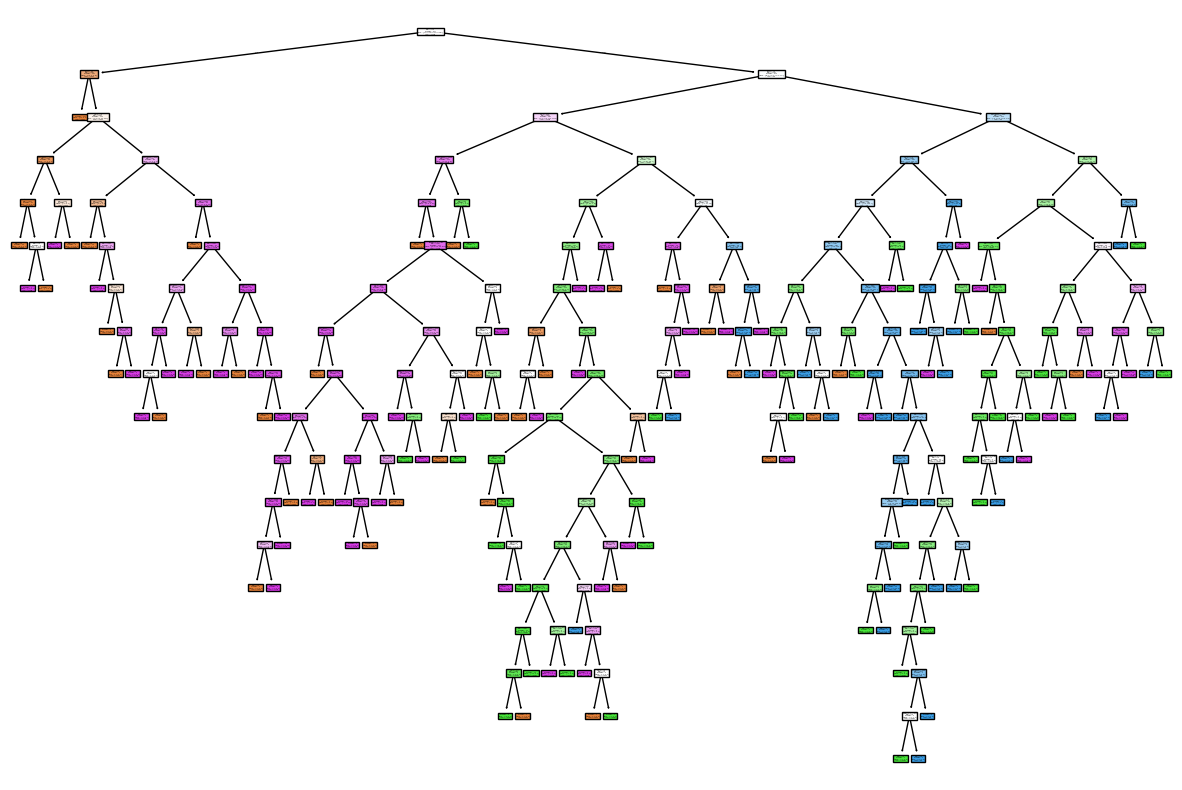

In [13]:
# Tampilkan data pertama
print("Data Pertama:")
print(df.head())

# Cek informasi dasar dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Pisahkan fitur (X) dan target (y)
X = df.drop('Siaga', axis=1)
y = df['Siaga']

# Convert categorical target variable to numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_ # Get the class names for plotting

#Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42) # Use y_encoded for training

# Tampilkan ukuran data latih dan data uji
print(f"\nUkuran Data Latih: {X_train.shape}")
print(f"Ukuran Data Uji: {X_test.shape}")

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
y_pred = model.predict(X_test)

# Tampilkan hasil prediksi pertama
print("\nPrediksi Pertama:")
print(y_pred[:5])

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report (precision, recall, f1-score)
cr = classification_report(y_test, y_pred, target_names=class_names) # Use class_names for the report
print("\nClassification Report:")
print(cr)

# Plot pohon keputusan
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names) # Use class_names for plotting
plt.show()